In [6]:
import requests
import os
import pickle
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
 
# Global Variables
CACHE_FN = "./Data/websites_headers_data.pkl"
TODAY_STR = pd.Timestamp.now().strftime('%Y-%m-%d')

In [8]:
driver = webdriver.Chrome(executable_path=r'C:/Users/berku/Desktop/DSI/chrome_driver/chromedriver.exe')

In [10]:
scrape = {
'CNN': {'url': 'https://www.cnn.com/',
        'elements': ['h2', 'h3']},
'FOX': {'url': 'https://www.foxnews.com/',
        'elements': ['h1','h3']},
'YAHOO': {'url': 'https://news.yahoo.com/',
          'elements': ['h1', 'h2', 'h3', 'h4']},
'HUFFPOST': {'url': 'https://www.huffpost.com/',
             'elements': ['h3', 'h4']},
'NYTIMES': {'url': 'https://www.nytimes.com/',
            'elements': ['h2']}
}

In [12]:
scrape['CNN']['elements']

['h2', 'h3']

In [13]:
daily_news_headers = {}

daily_news_headers['CNN'] = ['TEXTO1', 'TEXTO2']

In [17]:
list(scrape.keys())[:0]

[]

In [21]:
daily_news_headers = {}
pg = 'CNN'
# driver.get(scrape[pg]['url'])
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [24]:
elem = 'h2'
headers = soup.findAll(elem)

In [25]:
len(headers)

7

In [26]:
headers

[<h2 class="banner-text screaming-banner-text banner-text-size--char-44" data-analytics="_list-hierarchical-xs_article_">Obama delivers blistering rebuke of Trump</h2>,
 <h2 class="cn__title" data-analytics="News and buzz_list-xs_">News and buzz</h2>,
 <h2 class="cn__title" data-analytics="New discoveries_list-hierarchical-xs_">New discoveries</h2>,
 <h2 class="cn__title" data-analytics="More election coverage_list-hierarchical-xs_">More election coverage</h2>,
 <h2 class="cn__title" data-analytics="Check these out_grid-small_">Check these out</h2>,
 <h2 class="cn__title" data-analytics="CNN Business_list-hierarchical-xs_">CNN Business</h2>,
 <h2 class="zn-header__text"><a href="http://www.cnn.com/cnn-underscored/?iid=CNNUnderscoredHPcontainer">CNN Underscored</a><span class="zn-header__stripes"> </span></h2>]

In [30]:
result = []
for h in headers:
    result.append(h.text)
#     print(h.text)
            
result

['Obama delivers blistering rebuke of Trump',
 'News and buzz',
 'New discoveries',
 'More election coverage',
 'Check these out',
 'CNN Business',
 'CNN Underscored\xa0']

In [31]:
daily_news_headers['CNN'] = result
daily_news_headers

{'CNN': ['Obama delivers blistering rebuke of Trump',
  'News and buzz',
  'New discoveries',
  'More election coverage',
  'Check these out',
  'CNN Business',
  'CNN Underscored\xa0']}

In [32]:
daily_news_headers = {}
for pg in scrape.keys():
    print(pg)
    driver.get(scrape[pg]['url'])
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    elements = scrape[pg]['elements']
    result = []
    for elem in elements:
        headers = soup.findAll(elem)
        for h in headers:
            result.append(h.text)
    daily_news_headers[pg] = result

CNN
FOX
YAHOO
HUFFPOST
NYTIMES


In [44]:
all_headers = pickle.load(open(CACHE_FN, "rb" ))

In [45]:
all_headers.keys()

dict_keys(['2020-10-20', '2020-10-21'])

In [43]:
if os.path.isfile(CACHE_FN):
    all_headers = pickle.load(open(CACHE_FN, "rb" )) 
else:
    all_headers = {}
    
all_headers[TODAY_STR] = daily_news_headers

# Save Updated dictionary
pickle.dump(all_headers, open(CACHE_FN, "wb" ))  

## Word Cloud

In [7]:
all_headers = pickle.load(open(CACHE_FN, "rb" )) 

In [47]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

In [54]:
key = 'CNN'
text = ' '.join(all_headers['2020-10-21'][key])

In [55]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text)

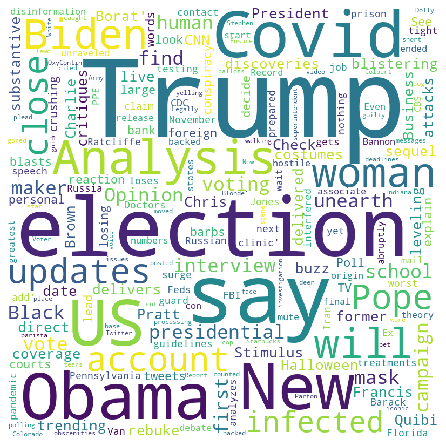

In [56]:
# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

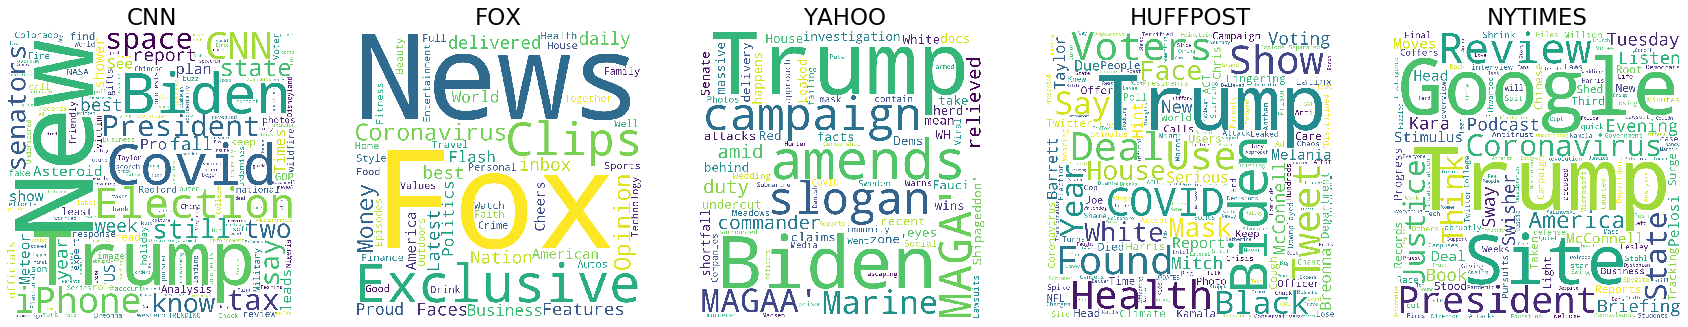

In [67]:
date = '2020-10-20'
plt.figure(figsize=(30, 30))  
# plt.suptitle(f'News Word cloud for {date}')
for index, website in enumerate(all_headers[date]):
#     print(index, website)
    # Generate wordcloud object
    text = ' '.join(all_headers['2020-10-20'][website])    
    wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text)
    
    # Print wordcloud image
    plt.subplot(1, numb_media_websites, index + 1).set_title(website, fontsize=23)
    plt.plot()
    plt.imshow(wordcloud)
    plt.axis("off")
    
plt.show()
# plt.figure(figsize=(10, 20))
# plt.show()

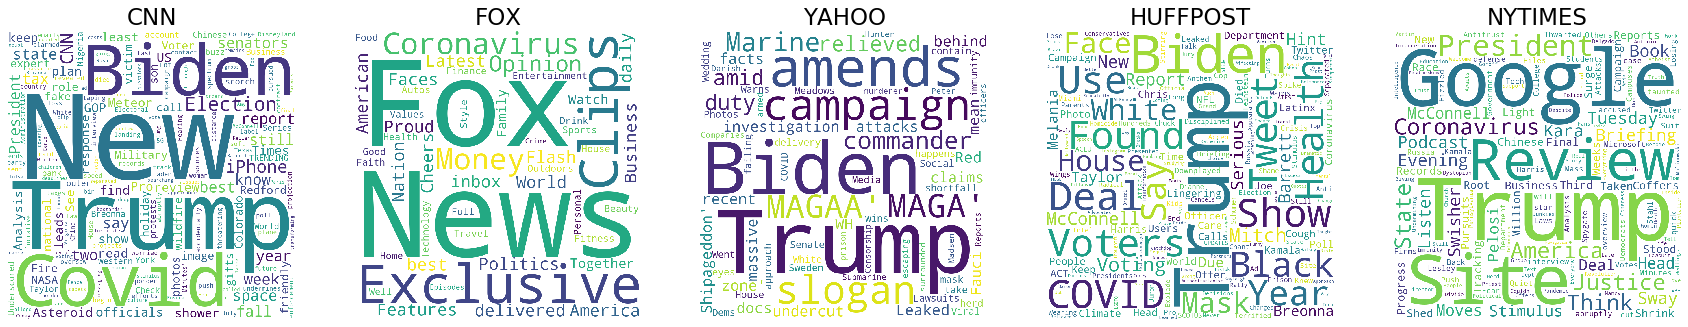

In [61]:
print_cloud('2020-10-20', all_headers)

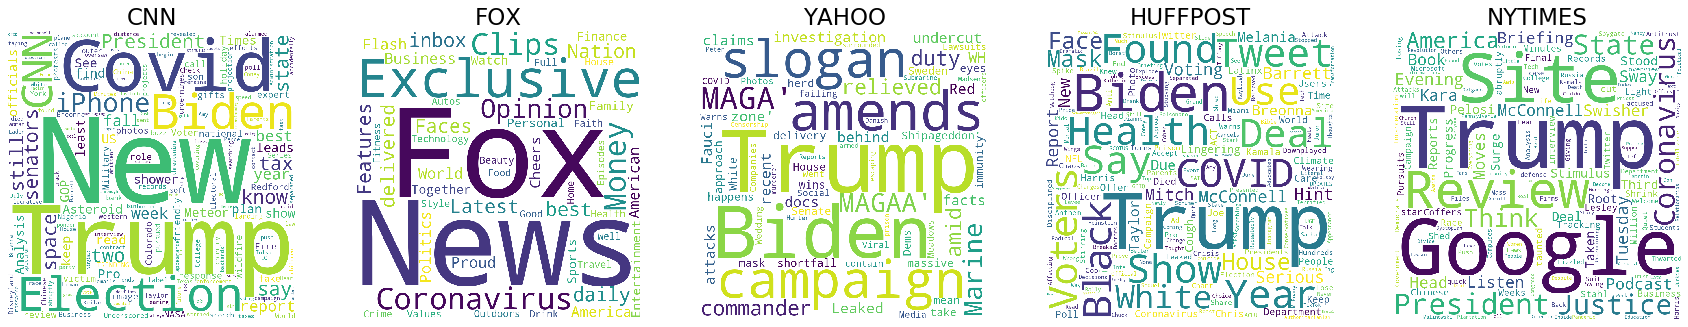

In [62]:
print_cloud('2020-10-21', all_headers)

In [60]:
def print_cloud(date, all_headers):
    plt.figure(figsize=(30, 30))  
    numb_media_websites = len(all_headers[date].keys())
    for index, website in enumerate(all_headers[date]):
        # Generate wordcloud object
        text = ' '.join(all_headers['2020-10-20'][website])    
        wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text)
    
        # Print wordcloud image
        plt.subplot(1, numb_media_websites, index + 1).set_title(website, fontsize=23)
        plt.plot()
        plt.imshow(wordcloud)
        plt.axis("off")
    
    plt.show()

In [68]:
df = pd.DataFrame(['JorgePintor', 'colegameu','FernandoAbraao'], columns=['Cidade'])

In [69]:
df

,Cidade
0,JorgePintor
1,colegameu
2,FernandoAbraao


In [82]:
import re
df['Cidade2'] =  df['Cidade'].map(lambda cidade: ' '.join(re.findall('[A-Z][^A-Z]*', cidade)))

In [83]:
df

,Cidade,Cidade2
0,JorgePintor,Jorge Pintor
1,colegameu,
2,FernandoAbraao,Fernando Abraao
